# PCA Implementation

**Objective:**
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Instructions:**
- Download the wine dataset from the UCI Machine Learning Repository
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

## Answer:
### 1. Load dataset

In [23]:
# load the dataset
import pandas as pd
df = pd.read_csv('wine.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 2. Split into features and target variables

In [24]:
y = df.pop(0)
x = df

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=24)

### 3. Perform data preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

### 4. Perform PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [31]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [33]:
x_train.head()

,0,1,2,3,4,5
0,-3.877202,-0.274480,0.343666,0.033464,-0.369898,-1.417197
1,2.224833,-2.362849,0.892236,-0.902976,0.037521,-0.051579
2,4.318918,-2.016585,-1.339730,0.337557,-1.380955,0.326597
3,-0.548462,1.936047,1.337350,-0.266552,-0.611463,0.199454
4,-1.168646,1.757168,0.980912,-0.404676,-0.742868,-0.063381


### 5. Explained variance ratio

In [45]:
print(pca.explained_variance_ratio_)

[0.35961954 0.19410313 0.11076406 0.07560809 0.06454902 0.05141589]


### 6. Find optimal number of principal components

In [71]:
# load the dataset and preprocess again
df = pd.read_csv('wine.data', sep=',', header=None)

y = df.pop(0)
x = df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [72]:
# write a function for finding optimal number of principal components
def optimal_no_components(x_train):
    """
    A function to determine the number of components that will capture over 90% variance ratio
    """
    count=0
    for i in range(1,12):
        pca = PCA(n_components=i)
        pca.fit_transform(x_train)
        count+=1
        if sum(pca.explained_variance_ratio_)>0.90:
            break
    return count

In [73]:
optimal_number = optimal_no_components(x_train)
print(f"The number of PCA components that will capture 90% variance ratio is: {optimal_number}")

The number of PCA components that will capture 90% variance ratio is: 8


In [75]:
#lets transform our data now
pca = PCA(n_components=8)

x_train = pd.DataFrame(pca.fit_transform(x_train))
x_test = pd.DataFrame(pca.transform(x_test))

In [78]:
#lets verify that we captured over 90% variance ratio
print(sum(pca.explained_variance_ratio_)*100)

91.83458918125145


### 7. Visualizing PCA results

Its not possible to visualize all the 8 dimensions of the transformed data but here's a scatter plot of the first two PCA components of x_train

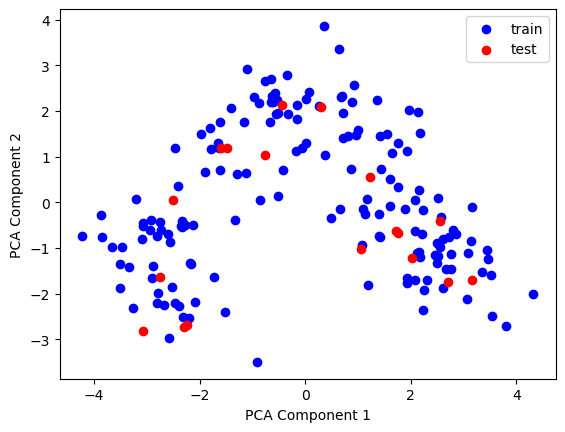

In [83]:
import matplotlib.pyplot as plt

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c='blue', label='train')
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c='red', label='test')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

### 8. Perform clustering on the transformed data

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)

train_labels = kmeans.labels_

#get the cluster labels for the test data
test_labels = kmeans.predict(x_test)

C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [86]:
test_labels

array([2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2])

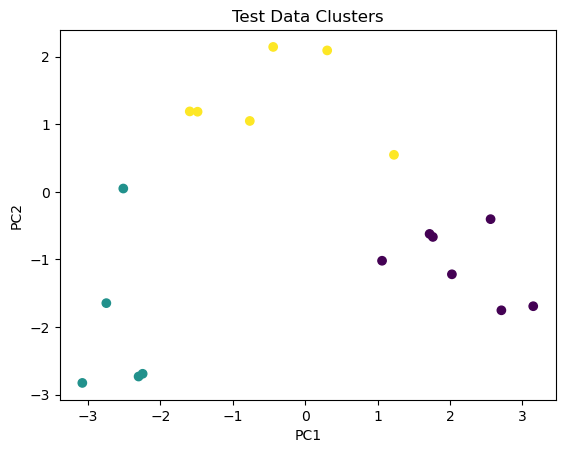

In [87]:
import matplotlib.pyplot as plt

#create a scatter plot of the first two principal components of the test data, colored by cluster label
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=test_labels)
plt.title('Test Data Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 9. Interpreting the clusters
- As we can see in the grapth the points that are closer to each other have been grouped together into a single cluster. There are total of 3 clusters because we set n_clusters=3 while instantating the kmeans object